# Plot Data on a Map

### Work in progress notebook

In [3]:
import xarray as xr

ds = xr.open_dataset('https://thredds.met.no/thredds/dodsC/remotesensingenvisat/asar-doppler/2012/01/27/ASA_WSDV2PRNMI20120127_215005_000612433111_00101_51839_0000.nc')

ds

<xarray.Dataset> Size: 39MB
Dimensions:             (y: 602, x: 851)
Dimensions without coordinates: y, x
Data variables: (12/19)
    sensor_view_angle   (y, x) float32 2MB ...
    incidence_angle     (y, x) float32 2MB ...
    sensor_azimuth      (y, x) float32 2MB ...
    sigma0_VV           (y, x) float32 2MB ...
    topographic_height  (y, x) float32 2MB ...
    valid_land_doppler  (y, x) float32 2MB ...
    ...                  ...
    u_range             (y, x) float32 2MB ...
    std_u_range         (y, x) float32 2MB ...
    wind_direction      (y, x) float32 2MB ...
    wind_speed          (y, x) float32 2MB ...
    longitude           (y, x) float32 2MB ...
    latitude            (y, x) float32 2MB ...
Attributes: (12/75)
    GDAL:                       GDAL 3.2.1, released 2020/12/29
    acknowledgement:            GSAR IDL pre-processing software was develope...
    azimuth_start_time:         2012-01-27T21:50:05.173597
    contributor_email:          jeong-won.park@kopri.re.kr, hjoh@norceresearc...
    contributor_institution:    Korea Polar Research Institute (KOPRI), NORCE...
    contributor_name:           Jeong-Won Park, Harald Johnsen, Geir Engen
    ...                         ...
    ysamplefreq_slc:            1711.9144385026736
    ysize:                      629
    ytime:                      2012-01-27T21:50:05.173597Z
    ytime_slc:                  2012-01-27T21:50:04.077748
    summary_no:                 Kalibrert geofysisk Dopplerskift fra ENVISAT ...
    title_no:                   Kalibrert geofysisk ENVISAT ASAR Dopplerskift...

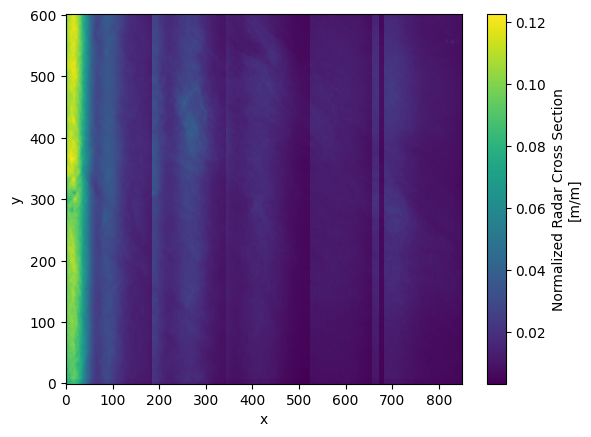

In [4]:
ds.sigma0_VV.plot()

In [5]:
# how to open data when downloaded from the staging page: https://data-staging.met.no/metsis/elements/no-met-staging-e19b9c36-a9dc-4e13-8827-c998b9045b54/search
import os
import glob
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.colors import TwoSlopeNorm

# Get the path of the home directory
home_dir = os.path.expanduser("~")

# Use os.path.join to combine paths
path2files = os.path.join(home_dir, "Downloads") # "Dowloads" --> path to files

# 'ASA_WSDV2PRNMI20120314_023113_000605493112_00334_52503_0000.nc'
desired_files_paths = glob.glob(os.path.join(path2files, "ASA_*.nc"))
print(desired_files_paths)
#'''
files2open = []
for i in range(len(desired_files_paths)):
    ith_file = desired_files_paths[i].replace(path2files+'/', '')
    print(ith_file)
    files2open.append(ith_file)

print(files2open)
#'''
ds = xr.open_dataset(desired_files_paths[0]) # Figure out how to just be able to find downloads whenever...
print(desired_files_paths[0])
ds



['/home/josteines/Downloads/ASA_WSDV2PRNMI20120127_215005_000612433111_00101_51839_0000.nc', '/home/josteines/Downloads/ASA_WSDV2PRNMI20120127_214952_000596143111_00101_51839_0000.nc']
ASA_WSDV2PRNMI20120127_215005_000612433111_00101_51839_0000.nc
ASA_WSDV2PRNMI20120127_214952_000596143111_00101_51839_0000.nc
['ASA_WSDV2PRNMI20120127_215005_000612433111_00101_51839_0000.nc', 'ASA_WSDV2PRNMI20120127_214952_000596143111_00101_51839_0000.nc']
/home/josteines/Downloads/ASA_WSDV2PRNMI20120127_215005_000612433111_00101_51839_0000.nc


<xarray.Dataset> Size: 39MB
Dimensions:             (y: 602, x: 851)
Dimensions without coordinates: y, x
Data variables: (12/19)
    sensor_view_angle   (y, x) float32 2MB ...
    incidence_angle     (y, x) float32 2MB ...
    sensor_azimuth      (y, x) float32 2MB ...
    sigma0_VV           (y, x) float32 2MB ...
    topographic_height  (y, x) float32 2MB ...
    valid_land_doppler  (y, x) float32 2MB ...
    ...                  ...
    u_range             (y, x) float32 2MB ...
    std_u_range         (y, x) float32 2MB ...
    wind_direction      (y, x) float32 2MB ...
    wind_speed          (y, x) float32 2MB ...
    longitude           (y, x) float32 2MB ...
    latitude            (y, x) float32 2MB ...
Attributes: (12/75)
    GDAL:                       GDAL 3.2.1, released 2020/12/29
    acknowledgement:            GSAR IDL pre-processing software was develope...
    azimuth_start_time:         2012-01-27T21:50:05.173597
    contributor_email:          jeong-won.park@kopri.re.kr, hjoh@norceresearc...
    contributor_institution:    Korea Polar Research Institute (KOPRI), NORCE...
    contributor_name:           Jeong-Won Park, Harald Johnsen, Geir Engen
    ...                         ...
    ysamplefreq_slc:            1711.9144385026736
    ysize:                      629
    ytime:                      2012-01-27T21:50:05.173597Z
    ytime_slc:                  2012-01-27T21:50:04.077748
    summary_no:                 Kalibrert geofysisk Dopplerskift fra ENVISAT ...
    title_no:                   Kalibrert geofysisk ENVISAT ASAR Dopplerskift...

In [6]:
ds = xr.open_dataset('ASA_WSDV2PRNMI20120127_215005_000612433111_00101_51839_0000.nc')
ds

<xarray.Dataset> Size: 39MB
Dimensions:             (y: 602, x: 851)
Dimensions without coordinates: y, x
Data variables: (12/19)
    sensor_view_angle   (y, x) float32 2MB ...
    incidence_angle     (y, x) float32 2MB ...
    sensor_azimuth      (y, x) float32 2MB ...
    sigma0_VV           (y, x) float32 2MB ...
    topographic_height  (y, x) float32 2MB ...
    valid_land_doppler  (y, x) float32 2MB ...
    ...                  ...
    u_range             (y, x) float32 2MB ...
    std_u_range         (y, x) float32 2MB ...
    wind_direction      (y, x) float32 2MB ...
    wind_speed          (y, x) float32 2MB ...
    longitude           (y, x) float32 2MB ...
    latitude            (y, x) float32 2MB ...
Attributes: (12/75)
    GDAL:                       GDAL 3.2.1, released 2020/12/29
    acknowledgement:            GSAR IDL pre-processing software was develope...
    azimuth_start_time:         2012-01-27T21:50:05.173597
    contributor_email:          jeong-won.park@kopri.re.kr, hjoh@norceresearc...
    contributor_institution:    Korea Polar Research Institute (KOPRI), NORCE...
    contributor_name:           Jeong-Won Park, Harald Johnsen, Geir Engen
    ...                         ...
    ysamplefreq_slc:            1711.9144385026736
    ysize:                      629
    ytime:                      2012-01-27T21:50:05.173597Z
    ytime_slc:                  2012-01-27T21:50:04.077748
    summary_no:                 Kalibrert geofysisk Dopplerskift fra ENVISAT ...
    title_no:                   Kalibrert geofysisk ENVISAT ASAR Dopplerskift...

In [7]:
ds.fdg

<xarray.DataArray 'fdg' (y: 602, x: 851)> Size: 2MB
[512302 values with dtype=float32]
Dimensions without coordinates: y, x
Attributes:
    long_name:                 Radar Doppler frequency shift due to surface v...
    apriori_offset:            19.63, 19.15, 20.26, 24.78, 16.75
    apriori_offset_corrected:  cdop, cdop, cdop, cdop, cdop
    colormap:                  cmocean.cm.balance
    dataType:                  6
    minmax:                    -60 60
    name:                      fdg
    offset:                    20.11, 20.11, 20.11, 20.11, 20.11
    offset_corrected:          cdop, cdop, cdop, cdop, cdop
    SourceBand:                11
    SourceFilename:            /vsimem/XYMEKKZ7EH.vrt
    units:                     Hz

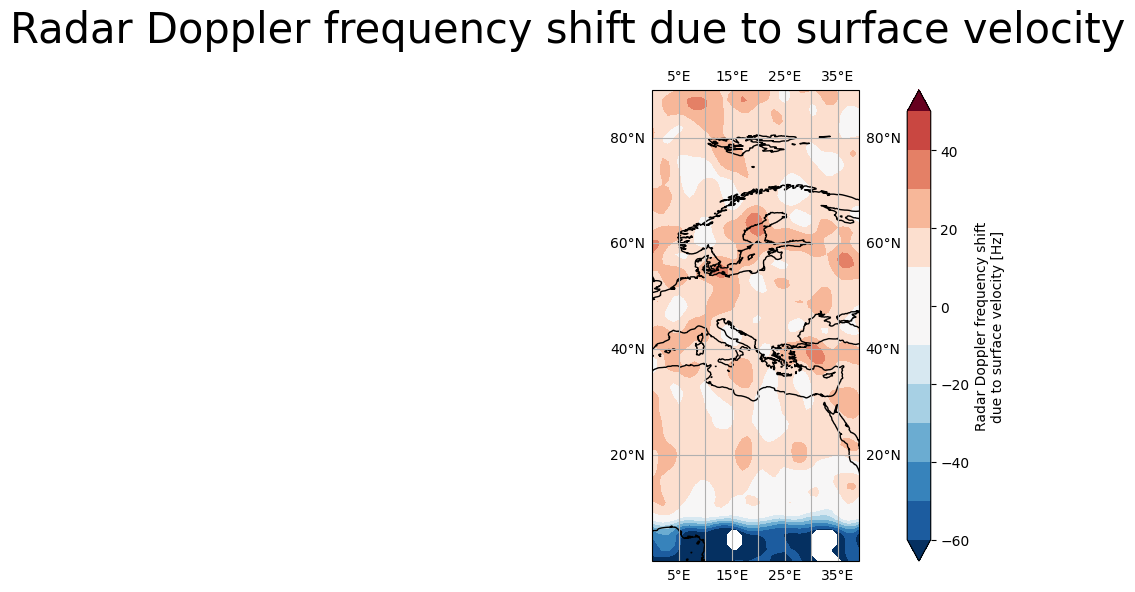

In [8]:
# Assuming ds is your Dataset - This was when I thought the longitude spanned from 0 to 360. It clearly doesn't....
# ds['x'] = xr.where(ds['x'] > 180, ds['x'] - 360, ds['x'])

# Now select your slice
variable = ds.fdg.sel(x=slice(-140, -100), y=slice(0, 90))

fig, ax = plt.subplots(1, figsize=(10, 6))

fig.suptitle(f'{variable.long_name}', fontsize = 30)

ax.axis('off')
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

# Adding latitude and longitude gridlines
gl = ax.gridlines(draw_labels=True)

# This handles the labels (North, South, East, West)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
# gl.xlocator = mticker.FixedLocator([-180, -120, -60, 0, 60, 120, 180])
# gl.ylocator = mticker.FixedLocator([-90, -60, -30, 0, 30, 60, 90])

levels_step = 10
# levels_max = round(float(ds.fdg.max()))
levels_max = 60
# levels_min = round(float(ds.fdg.min()))
levels_min = -60

variable.plot.contourf(ax=ax, x='x', y='y',
                    extend = 'both', # 'neiter', 'upper', 'lower'
                    norm = TwoSlopeNorm(vmin = levels_min, vcenter = 0, vmax = levels_max),
                    levels = np.arange(levels_min, levels_max, levels_step)
                    # cbar_kwargs = {'label': f'{ds.fdg.units}'}
                    )

# ax.set_ylim(round(ds.geospatial_lat_min), round(ds.geospatial_lat_max))
# ax.set_xlim(round(ds.geospatial_lon_min), round(ds.geospatial_lon_max))S

plt.tight_layout()

In [9]:
ds.fdg.max()

<xarray.DataArray 'fdg' ()> Size: 4B
array(81.06687, dtype=float32)

In [10]:
ds.fdg.min()

<xarray.DataArray 'fdg' ()> Size: 4B
array(-79.629745, dtype=float32)

In [11]:
round(ds.geospatial_lat_max)
ds.geospatial_lat_max

28.031118

In [12]:
round(ds.geospatial_lat_min)

24

In [13]:
round(float(ds.fdg.max()))

81

In [14]:
ds.fdg.mean()

<xarray.DataArray 'fdg' ()> Size: 4B
array(20.179012, dtype=float32)

In [15]:
ds.x

<xarray.DataArray 'x' (x: 851)> Size: 7kB
array([  0,   1,   2, ..., 848, 849, 850])
Dimensions without coordinates: x

In [16]:
# plt.contourf(ds.valid_land_doppler)
ds

<xarray.Dataset> Size: 39MB
Dimensions:             (y: 602, x: 851)
Dimensions without coordinates: y, x
Data variables: (12/19)
    sensor_view_angle   (y, x) float32 2MB ...
    incidence_angle     (y, x) float32 2MB ...
    sensor_azimuth      (y, x) float32 2MB ...
    sigma0_VV           (y, x) float32 2MB ...
    topographic_height  (y, x) float32 2MB ...
    valid_land_doppler  (y, x) float32 2MB ...
    ...                  ...
    u_range             (y, x) float32 2MB ...
    std_u_range         (y, x) float32 2MB ...
    wind_direction      (y, x) float32 2MB ...
    wind_speed          (y, x) float32 2MB ...
    longitude           (y, x) float32 2MB ...
    latitude            (y, x) float32 2MB ...
Attributes: (12/75)
    GDAL:                       GDAL 3.2.1, released 2020/12/29
    acknowledgement:            GSAR IDL pre-processing software was develope...
    azimuth_start_time:         2012-01-27T21:50:05.173597
    contributor_email:          jeong-won.park@kopri.re.kr, hjoh@norceresearc...
    contributor_institution:    Korea Polar Research Institute (KOPRI), NORCE...
    contributor_name:           Jeong-Won Park, Harald Johnsen, Geir Engen
    ...                         ...
    ysamplefreq_slc:            1711.9144385026736
    ysize:                      629
    ytime:                      2012-01-27T21:50:05.173597Z
    ytime_slc:                  2012-01-27T21:50:04.077748
    summary_no:                 Kalibrert geofysisk Dopplerskift fra ENVISAT ...
    title_no:                   Kalibrert geofysisk ENVISAT ASAR Dopplerskift...

In [36]:
def plotting_variables_on_a_map(variable, lat_min, lat_max, lon_min, lon_max, number_of_colorbar_intervals):  # var_min, var_max, var_step
    # Define the extent of your data
    # lat_min, lat_max = 20, 50  # replace with your actual values
    # lon_min, lon_max = -85, -65  # replace with your actual values

    # Create a linear space for latitude and longitude
    lat = np.linspace(ds.geospatial_lat_min, ds.geospatial_lat_max, ds.sizes['y'])
    lon = np.linspace(ds.geospatial_lon_min, ds.geospatial_lon_max, ds.sizes['x'])

    # variable = ds.fdg

    # Create a new xarray DataArray with latitude and longitude as coordinates
    variable_with_coords = xr.DataArray(variable.values, coords=[('lat', lat), ('lon', lon)], dims=['y', 'x'])

    # Assign variable attributes from the original variable DataArray
    variable_with_coords.attrs = variable.attrs

    # Assign global attributes from the original Dataset as a new attribute in the DataArray
    # variable_with_coords.attrs = ds.attrs # I THINK THIS OVERRIDES THE VARIABLE ATTRIBUTES...

    # Now select your slice - defined by the latitudinal and longitudinal extent of the data
    plotable_variable = variable_with_coords.sel(x=slice(ds.geospatial_lon_min, ds.geospatial_lon_max), y=slice(ds.geospatial_lat_min, ds.geospatial_lat_max))

    # Ready to plot the variable on a map using subplot package of matplotlib.pyplot
    fig, ax = plt.subplots(1, figsize=(7, 7))
    fig.suptitle(f'{plotable_variable.long_name}', fontsize = 15)
    ax.axis('off')

    # Set the projection
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()

    # Create the gridlines and configure the labels
    gl = ax.gridlines(draw_labels=True)
    gl.bottom_labels = True   # Default
    gl.left_labels = True     # Default
    gl.top_labels = False     # Not default
    gl.right_labels = False   # Not default

    # Defining var_min, var_max and var_step --- using the variable attribute minmax to extract var_min and var_max
    var_min = int(plotable_variable.minmax.split(' ')[0])
    var_max = int(plotable_variable.minmax.split(' ')[1])
    
    var_step = ((var_max - var_min) / number_of_colorbar_intervals)

    var_max = int(plotable_variable.minmax.split(' ')[1]) + var_step   # redefining the max val to makes the plot nicer around center

    # Plot the data
    plotable_variable.plot.contourf(ax=ax, x='x', y='y',
                        extend='both',
                        norm=TwoSlopeNorm(vmin=var_min, vcenter=0, vmax=var_max),
                        levels=np.arange(var_min, var_max, var_step),      
                        cbar_kwargs = {'label': f'[{plotable_variable.units}]'}
                        )

    # Setting the extent on the map that is plotted
    ax.set_ylim(lat_min, lat_max)
    ax.set_xlim(lon_min, lon_max)

    plt.tight_layout()
    plt.show()

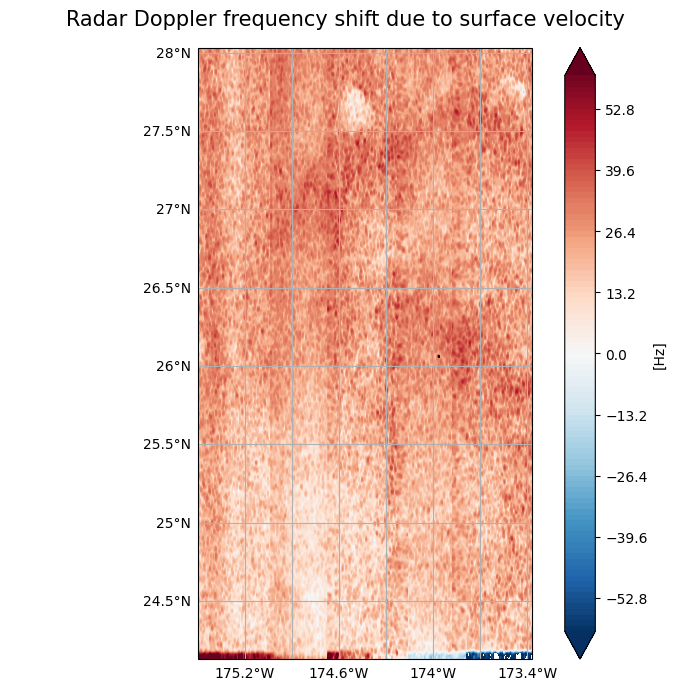

In [37]:
# Just plotting the desired variable within its geographical extent - using the metadata for the geographical extent as lat/lon min/max values.

plotting_variables_on_a_map(variable = ds.fdg, 
                            lat_min = ds.geospatial_lat_min, lat_max = ds.geospatial_lat_max,
                            lon_min = ds.geospatial_lon_min, lon_max = ds.geospatial_lon_max,
                            number_of_colorbar_intervals = 100
                            )

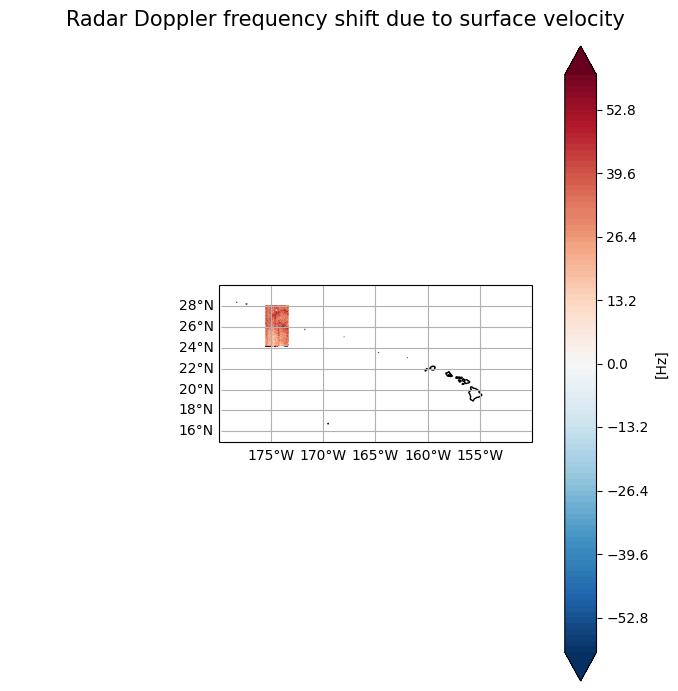

In [44]:
# Determine the spatial extent for yourself:

plotting_variables_on_a_map(variable = ds.fdg, 
                            lat_min = 15, lat_max = 30,
                            lon_min = -200, lon_max = -150,
                            number_of_colorbar_intervals = 100
                            )

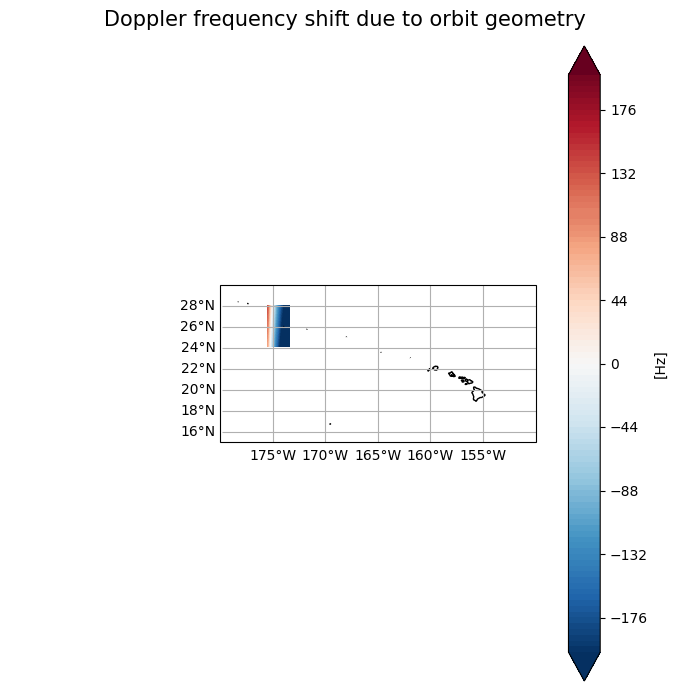

In [45]:
# ds = xr.open_dataset('ASA_WSDV2PRNMI20120314_025051_000616473112_00334_52503_0000.nc')

plotting_variables_on_a_map(variable = ds.fgeo, 
                            # lat_min = 20, lat_max = 50,
                            # lon_min = -85, lon_max = -65 
                            lat_min = 15, lat_max = 30,
                            lon_min = -200, lon_max = -150,
                            number_of_colorbar_intervals = 100
                            )

In [40]:
ds

<xarray.Dataset> Size: 39MB
Dimensions:             (y: 602, x: 851)
Dimensions without coordinates: y, x
Data variables: (12/19)
    sensor_view_angle   (y, x) float32 2MB ...
    incidence_angle     (y, x) float32 2MB ...
    sensor_azimuth      (y, x) float32 2MB ...
    sigma0_VV           (y, x) float32 2MB ...
    topographic_height  (y, x) float32 2MB ...
    valid_land_doppler  (y, x) float32 2MB ...
    ...                  ...
    u_range             (y, x) float32 2MB ...
    std_u_range         (y, x) float32 2MB ...
    wind_direction      (y, x) float32 2MB ...
    wind_speed          (y, x) float32 2MB ...
    longitude           (y, x) float32 2MB ...
    latitude            (y, x) float32 2MB ...
Attributes: (12/75)
    GDAL:                       GDAL 3.2.1, released 2020/12/29
    acknowledgement:            GSAR IDL pre-processing software was develope...
    azimuth_start_time:         2012-01-27T21:50:05.173597
    contributor_email:          jeong-won.park@kopri.re.kr, hjoh@norceresearc...
    contributor_institution:    Korea Polar Research Institute (KOPRI), NORCE...
    contributor_name:           Jeong-Won Park, Harald Johnsen, Geir Engen
    ...                         ...
    ysamplefreq_slc:            1711.9144385026736
    ysize:                      629
    ytime:                      2012-01-27T21:50:05.173597Z
    ytime_slc:                  2012-01-27T21:50:04.077748
    summary_no:                 Kalibrert geofysisk Dopplerskift fra ENVISAT ...
    title_no:                   Kalibrert geofysisk ENVISAT ASAR Dopplerskift...

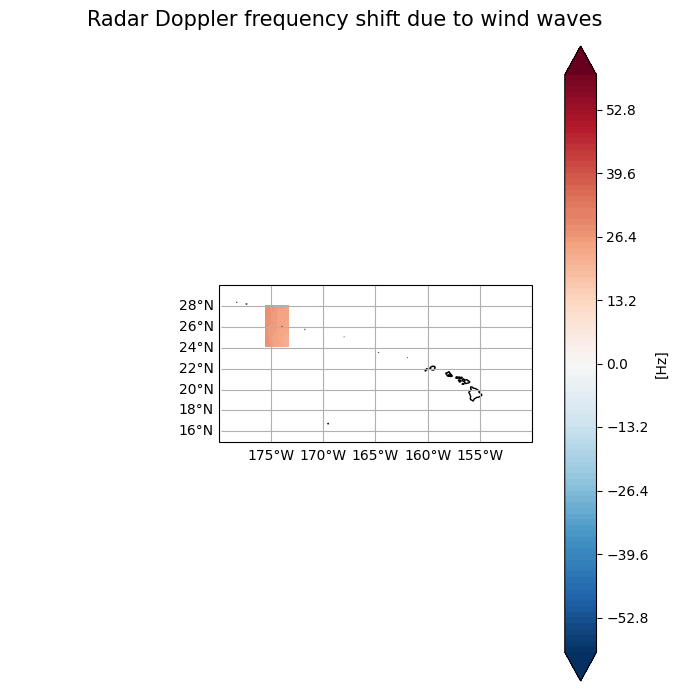

In [46]:
plotting_variables_on_a_map(variable = ds.fww, 
                            # lat_min = 20, lat_max = 50,
                            # lon_min = -85, lon_max = -65 
                            lat_min = 15, lat_max = 30,
                            lon_min = -200, lon_max = -150,
                            number_of_colorbar_intervals = 100
                            )

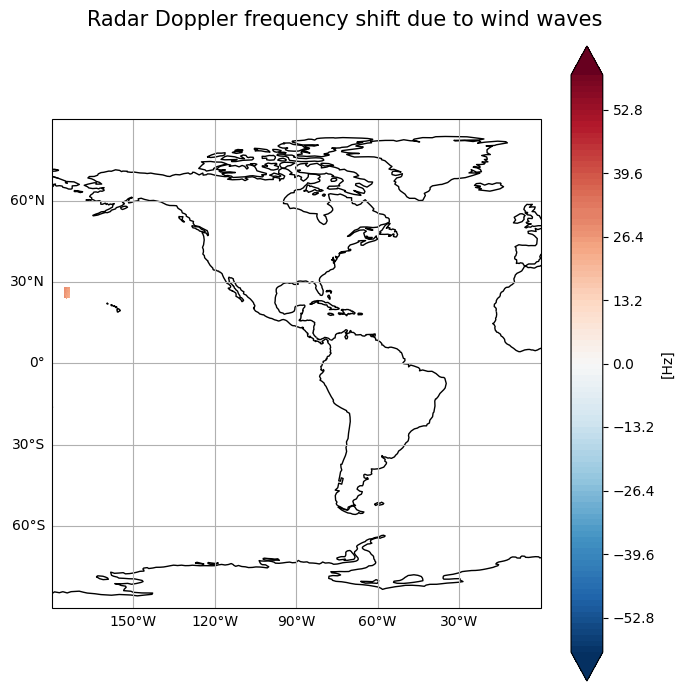

In [47]:
# Plotting half the world for the sake of it

plotting_variables_on_a_map(variable = ds.fww, 
                            lat_min = -90, lat_max = 90,
                            lon_min = -180, lon_max = 0, 
                            number_of_colorbar_intervals = 100
                            )

In [43]:
ds

<xarray.Dataset> Size: 39MB
Dimensions:             (y: 602, x: 851)
Dimensions without coordinates: y, x
Data variables: (12/19)
    sensor_view_angle   (y, x) float32 2MB ...
    incidence_angle     (y, x) float32 2MB ...
    sensor_azimuth      (y, x) float32 2MB ...
    sigma0_VV           (y, x) float32 2MB ...
    topographic_height  (y, x) float32 2MB ...
    valid_land_doppler  (y, x) float32 2MB ...
    ...                  ...
    u_range             (y, x) float32 2MB ...
    std_u_range         (y, x) float32 2MB ...
    wind_direction      (y, x) float32 2MB ...
    wind_speed          (y, x) float32 2MB ...
    longitude           (y, x) float32 2MB ...
    latitude            (y, x) float32 2MB ...
Attributes: (12/75)
    GDAL:                       GDAL 3.2.1, released 2020/12/29
    acknowledgement:            GSAR IDL pre-processing software was develope...
    azimuth_start_time:         2012-01-27T21:50:05.173597
    contributor_email:          jeong-won.park@kopri.re.kr, hjoh@norceresearc...
    contributor_institution:    Korea Polar Research Institute (KOPRI), NORCE...
    contributor_name:           Jeong-Won Park, Harald Johnsen, Geir Engen
    ...                         ...
    ysamplefreq_slc:            1711.9144385026736
    ysize:                      629
    ytime:                      2012-01-27T21:50:05.173597Z
    ytime_slc:                  2012-01-27T21:50:04.077748
    summary_no:                 Kalibrert geofysisk Dopplerskift fra ENVISAT ...
    title_no:                   Kalibrert geofysisk ENVISAT ASAR Dopplerskift...